In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"2d7e3531-e9ac-484b-8a2c-df4122e0436a\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Master TS Excel Long Short Only Report\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
!pip install QuantStats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# specify the file path
file_path = 'https://github.com/alexbernal0/QEP/raw/main/ESLS23.xlsx'

# read in the 'Trades List' sheet
df = pd.read_excel(file_path, sheet_name='Trades List')

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#', 'Date/Time', 'Profit/Loss']]

# Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

# Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

# Switch places of 'Profit/Loss' and 'closedDate' columns
df = df[['#', 'Date/Time', 'Exit Date/Time', 'Profit/Loss']]

df['CumPL'] = 100000 + df['Profit/Loss'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

#Create a new column called 'returnPerc'
df['returnPerc'] = df['CumPL'].pct_change()
# Set the first value of 'returnPerc' to 0
df.at[df.index[0], 'returnPerc'] = -0.002

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date', inplace=True)

df.head()


,#,Date/Time,Exit Date/Time,Profit/Loss,CumPL,returnPerc
Date,,,,,,
2007-11-02 10:30:00,1.0,2007-11-02 10:30:00,2007-11-05 10:00:00,-100.0,99900.0,-0.002000
2007-11-05 13:00:00,2.0,2007-11-05 13:00:00,2007-11-06 10:00:00,-650.0,99250.0,-0.006507
2007-11-06 10:30:00,3.0,2007-11-06 10:30:00,2007-11-07 10:00:00,-250.0,99000.0,-0.002519
2007-11-07 11:30:00,4.0,2007-11-07 11:30:00,2007-11-08 10:00:00,1362.5,100362.5,0.013763
2007-11-07 11:30:00,5.0,2007-11-07 11:30:00,2007-11-08 10:00:00,1500.0,101862.5,0.014946


In [ ]:
# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date/Time', 'returnPerc']]

# Convert the date/time column to a pandas datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Rename the date/time column to just 'date'
df = df.rename(columns={'Date/Time': 'Date'})

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)



df

,returnPerc
Date,
2007-11-02 10:30:00,-0.002000
2007-11-05 13:00:00,-0.006507
2007-11-06 10:30:00,-0.002519
2007-11-07 11:30:00,0.013763
2007-11-07 11:30:00,0.014946
...,...
2023-03-29 10:30:00,0.007990
2023-03-29 10:30:00,0.004992
2023-03-30 13:30:00,0.000784


Performance Metrics

                           Strategy
-------------------------  ----------
Start Period               2007-11-02
End Period                 2023-03-31
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          481.75%
CAGR﹪                     8.2%

Sharpe                     1.11
Prob. Sharpe Ratio         99.99%
Smart Sharpe               0.99
Sortino                    1.65
Smart Sortino              1.46
Sortino/√2                 1.17
Smart Sortino/√2           1.04
Omega                      1.23

Max Drawdown               -19.29%
Longest DD Days            861
Volatility (ann.)          15.21%
Calmar                     0.43
Skew                       -0.13
Kurtosis                   5.63

Expected Daily %           0.06%
Expected Monthly %         0.96%
Expected Yearly %          10.91%
Kelly Criterion            9.69%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.51%
Expected Shortfall (cVaR)  -1.51%

Max Consecutive Wins      

None

Worst 5 Drawdowns

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-02-11,2010-11-15,2011-06-22,861,-19.291788,-18.720650
2,2008-05-06,2008-07-15,2008-10-13,160,-16.736333,-16.179002
3,2007-12-28,2008-01-16,2008-01-30,33,-15.220700,-14.348047
4,2019-03-27,2019-08-13,2019-12-09,258,-12.973264,-12.465232
5,2022-07-05,2022-11-21,2023-03-31,269,-12.650348,-12.291623


Strategy Visualization

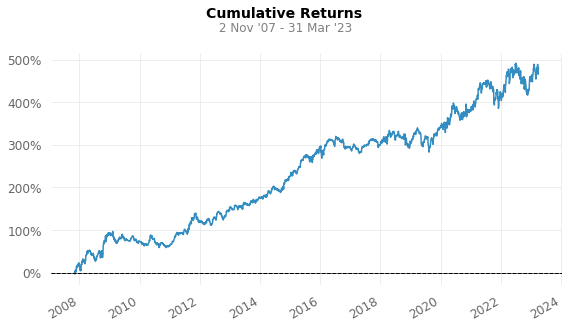

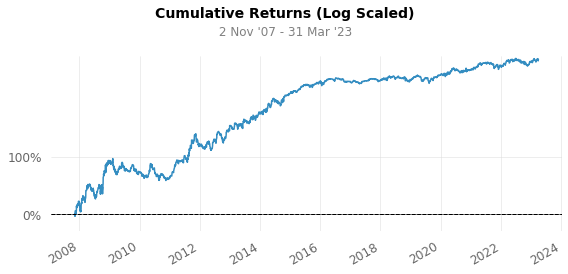

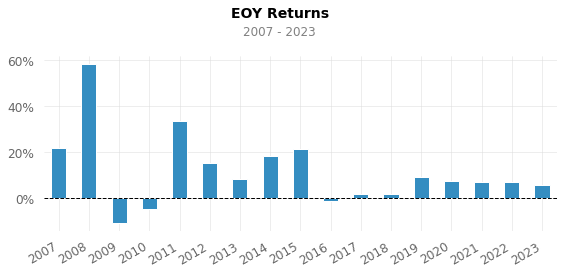

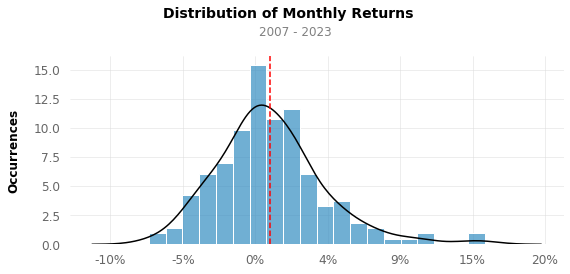

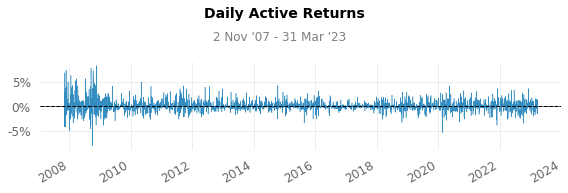

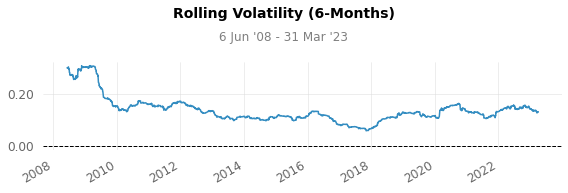

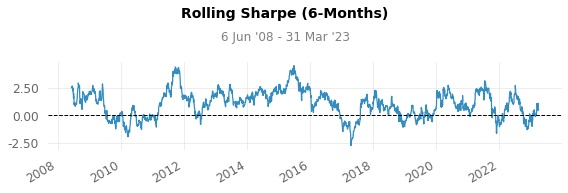

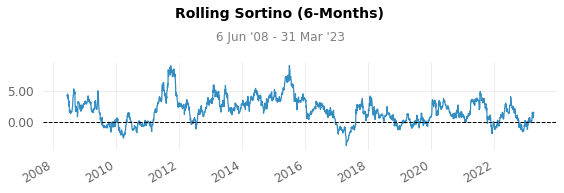

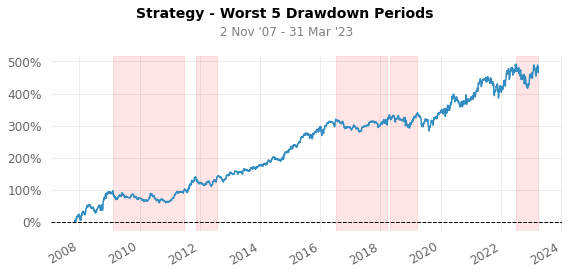

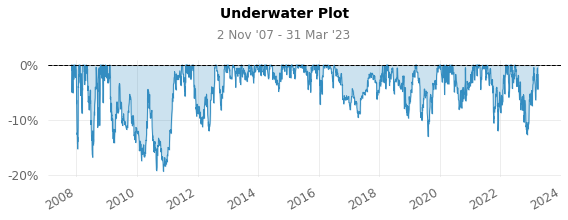

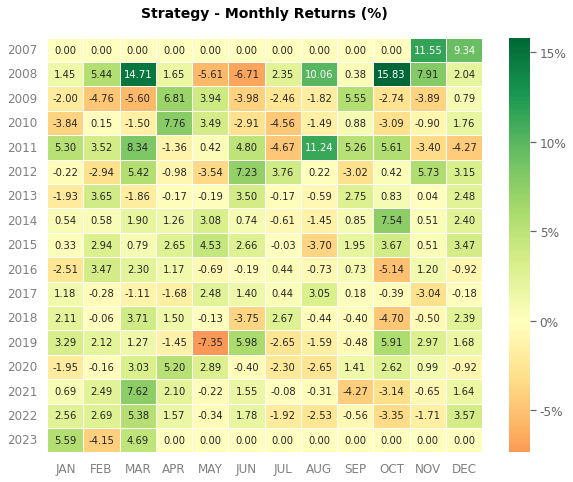

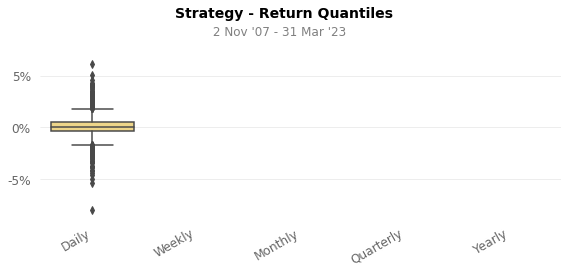

In [ ]:
#Convert dataframe to a series
series = pd.Series(df.returnPerc, index=df.index)
import quantstats as qs
#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [ ]:
qs.reports.html(series,title='ES Long Short')